In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv("Mumbai House Prices.csv")

df.head(5)

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [19]:
df = df.dropna()

price_multiplier = df['price_unit'].map({'Cr': 1, 'L': 0.01})
df['price'] = df['price'] * price_multiplier

X = df[["area"]]
y = df[["price"]]

Text(0, 0.5, 'Price')

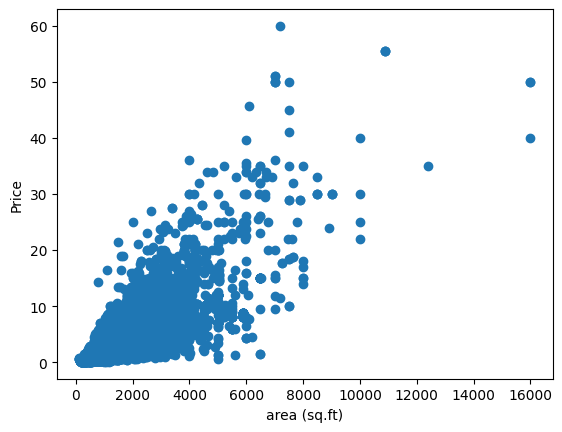

In [20]:
plt.scatter(X, y)
plt.xlabel("area (sq.ft)")
plt.ylabel("Price")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_train).reshape(-1, 1)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

c = model.intercept_
m = model.coef_

print(f"coeff = {c}")
print(f"slope = {m}")

coeff = [-0.82054787]
slope = [[0.00244356]]


In [23]:
y_pred = model.predict(X_train)

Text(0, 0.5, 'price')

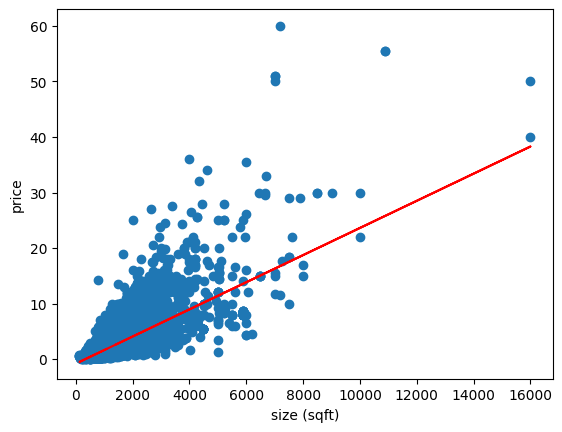

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="red")
plt.xlabel("size (sqft)")
plt.ylabel("price")

### Export the model

In [25]:
import pickle

with open('house.pkl', 'wb') as f:
    pickle.dump(model, f)